<a href="https://colab.research.google.com/github/Neel7317/Generative-Models/blob/main/Autoencoder(from_noise_to_original).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import mnist
import tensorflow as tf
### Importing Libraries

import keras
from keras import callbacks
from keras.models import Model
from tensorflow.keras.optimizers import Adadelta
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

### Downloading and Preprocessing of dataset and adding some noise to it.

import numpy as np

(trainX, trainy), (testX, testy) = mnist.load_data()

# to convert values from 0 to 255 into range 0 to 1.
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#add noise to the images
trainNoise = np.random.normal(loc=0.5, scale=0.5, size=trainX.shape)
testNoise = np.random.normal(loc=0.5, scale=0.5, size=testX.shape)
trainXNoisy = np.clip(trainX + trainNoise, 0, 1)
testXNoisy = np.clip(testX + testNoise, 0, 1)

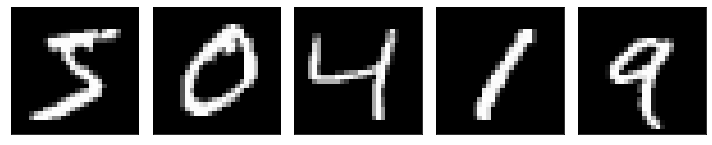

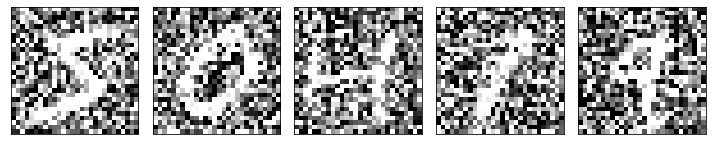

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainX[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 10))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(trainXNoisy[i].reshape(28, 28), cmap='gray')
plt.tight_layout()
plt.show()

In [6]:
#autoencoder
#encoder
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPool2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPool2D((2, 2), padding='same')(x)
# at this point the representation is (7, 7, 32)
#decoder..
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [7]:
autoencoder = Model(input_img, decoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Epoch 1/20
1875/1875 [==============================] - 167s 88ms/step - loss: 0.5466 - val_loss: 0.4822
Epoch 2/20
1875/1875 [==============================] - 160s 85ms/step - loss: 0.4614 - val_loss: 0.4465
Epoch 3/20
1875/1875 [==============================] - 164s 87ms/step - loss: 0.4246 - val_loss: 0.4059
Epoch 4/20
1875/1875 [==============================] - 166s 89ms/step - loss: 0.3728 - val_loss: 0.3405
Epoch 5/20
1875/1875 [==============================] - 163s 87ms/step - loss: 0.3086 - val_loss: 0.2863
Epoch 6/20
1875/1875 [==============================] - 164s 87ms/step - loss: 0.2721 - val_loss: 0.2623
Epoch 7/20
1875/1875 [==============================] - 165s 88ms/step - loss: 0.2546 - val_loss: 0.2484
Epoch 8/20
1875/1875 [==============================] - 166s 89ms/step - loss: 0.2430 - val_loss: 0.2380
Epoch 9/20
1875/1875 [==============================] - 166s 89ms/step - loss: 0.2338 - val_loss: 0.2294
Epoch 10/20
1875/1875 [==============================] 

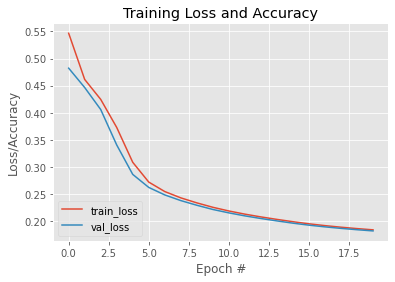

In [8]:
# train the convolutional autoencoder
H = autoencoder.fit(
	trainXNoisy, trainX,
	validation_data=(testXNoisy, testX),
	epochs=20,
	batch_size=32)
N = np.arange(0, 20)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [9]:
# predict the reconstructed images for the original images
pred = autoencoder.predict(testXNoisy)

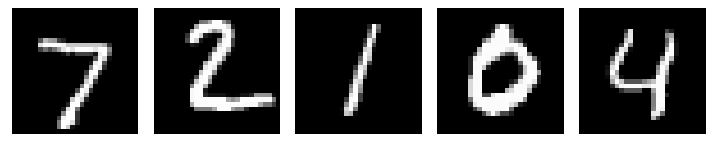

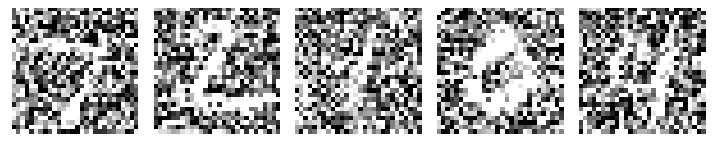

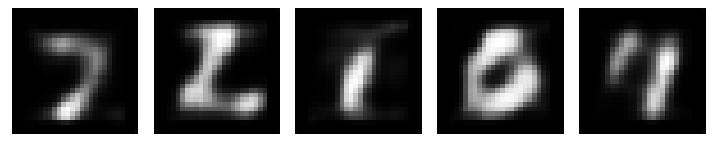

In [10]:
## Visualizing our results

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(testX[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(testXNoisy[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()

# to visualise reconstructed images(output of autoencoder)
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([]) # to remove x-axis  the [] empty list indicates this
    plt.yticks([]) # to remove y-axis
    plt.grid(False) # to remove grid
    plt.imshow(pred[i].reshape(28, 28), cmap='gray') #display the image 
plt.tight_layout() # to have a proper space in the subplots
plt.show()